In [831]:
from urllib.request import urlopen
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [832]:
#There were mixed values in columns 15, 19 (ages) and it read only 3 columns.
#changed it to object because there is a value '99 or older', so I will change it again later.

In [833]:
df = pd.read_csv("SHR1976_2015.csv", dtype={"VicAge": object, "OffAge": object}, na_values=['999','Unknown','0'])

In [834]:
pd.set_option('display.max_columns', 100)

In [835]:
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,StateName2
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,ALASKA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,Unknown or not reported,55,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,NaN,NaN,30180,Alaska,Rural Alaska,ALASKA
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,ALA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,NaN,NaN,30180,Alabama,"Birmingham-Hoover, AL",ALA
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,ALA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,NaN,NaN,30180,Alabama,"Birmingham-Hoover, AL",ALA
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,ALA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,NaN,NaN,30180,Alabama,"Birmingham-Hoover, AL",ALA
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,ALA,January,1.0,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,NaN,NaN,30180,Alabama,"Mobile, AL",ALA


In [836]:
df.shape

(732171, 33)

In [837]:
df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident        float64
ActionType       object
Homicide         object
Situation        object
VicAge           object
VicSex           object
VicRace          object
VicEthnic        object
OffAge           object
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount        float64
OffCount        float64
FileDate          int64
fstate           object
MSA              object
StateName2       object
dtype: object

In [838]:
#df['Homicide'].unique()
#df['Relationship'].unique()

In [839]:
df['VicAge'].unique()

array(['48', '65', '45', '43', '35', '25', '27', '42', '41', '50', '51',
       '49', '36', '19', '52', '17', nan, '14', '44', '24', '22', '46',
       '16', '67', '1', '18', '20', '38', '26', '58', '28', '2', '31',
       '32', '23', '34', '56', '68', '60', '30', '21', '29', '33', '82',
       '9', '66', '39', '47', '55', '69', '62', '59', '40', '53', '12',
       '54', '61', '37', '77', '84', '63', '57', '4', '78', '71', '70',
       '15', '64', '73', '13', '79', '5', '76', '10', '11', '3', '75',
       '80', '72', '74', '6', '90', '99 years old or more', '85', '86',
       '83', '87', '88', '81', '7', '8', '92', '93', '94', '91', '95',
       '89', '97', '96', '98'], dtype=object)

In [840]:
df.shape

(732171, 33)

In [841]:
#df['Incident'].unique()

In [842]:
df = df[df['Homicide'] == 'Murder and non-negligent manslaughter']

In [843]:
df.shape

(721898, 33)

In [844]:
df = df[df['Solved'] == "Yes"]

In [845]:
df.shape

(508417, 33)

In [846]:
df = df[df['Relationship'] != 'Unknown']

In [847]:
df.shape

(508417, 33)

In [848]:
df = df[df['VicSex'] != 'Unknown']

In [849]:
df.shape

(508417, 33)

In [850]:
df = df[df['OffSex'] != 'Unknown']

In [851]:
df.shape

(508417, 33)

In [852]:
#df['VicAge'].replace(np.nan, 0, inplace=True)

In [853]:
#df['VicAge']

In [854]:
df.replace('99 years old or more', '99', inplace=True)

In [855]:
df['VicAge'] = df['VicAge'].str.replace("99 years old or more","99").astype(float)

In [856]:
df['OffAge'] = df['OffAge'].str.replace("1 year old","1").astype(float)

In [857]:
df = df[df['OffAge'] >= 4]

In [858]:
#df[['VicAge', 'OffAge']] = df[['VicAge', 'OffAge']].astype(int)

In [859]:
df = df.replace('Unknown', np.nan)

In [860]:
df.shape

(479497, 33)

In [861]:
df.drop(['CNTYFIPS', 'Ori','Agency', 'Agentype', 'StateName', 'VicEthnic', 'OffEthnic','Subcircum', 'FileDate', 'fstate','MSA', 'StateName2','VicCount','OffCount'],axis=1,inplace=True)

In [862]:
#df.drop('CNTYFIPS', axis=1, inplace=True)

In [863]:
df.shape

(479497, 19)

In [864]:
df.head(2)

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48.0,Male,American Indian or Alaskan Native,55.0,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments
1,197601001AL00102,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Male,Black,67.0,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen


In [865]:
df.groupby('Relationship')['Weapon'].value_counts()

Relationship  Weapon                              
Acquaintance  Handgun - pistol, revolver, etc         68575
              Knife or cutting instrument             27731
              Shotgun                                  9646
              Personal weapons, includes beating       7898
              Blunt object - hammer, club, etc         7072
              Rifle                                    6571
              Firearm, type not stated                 4976
              Other or type unknown                    3210
              Strangulation - hanging                  1361
              Fire                                     1080
              Asphyxiation - includes death by gas      471
              Narcotics or drugs, sleeping pills        341
              Other gun                                 328
              Drowning                                  135
              Poison - does not include gas              73
              Pushed or thrown out window        

In [866]:
df.dtypes

ID               object
State            object
Source           object
Solved           object
Year              int64
Month            object
Incident        float64
ActionType       object
Homicide         object
Situation        object
VicAge          float64
VicSex           object
VicRace          object
OffAge          float64
OffSex           object
OffRace          object
Weapon           object
Relationship     object
Circumstance     object
dtype: object

In [867]:
df.groupby('Relationship')['Weapon'].value_counts().sort_values(ascending = False)

Relationship                 Weapon                              
Acquaintance                 Handgun - pistol, revolver, etc         68575
Stranger                     Handgun - pistol, revolver, etc         54336
Relationship not determined  Handgun - pistol, revolver, etc         28725
Acquaintance                 Knife or cutting instrument             27731
Other - known to victim      Handgun - pistol, revolver, etc         13832
Wife                         Handgun - pistol, revolver, etc         12730
Stranger                     Knife or cutting instrument             11646
Friend                       Handgun - pistol, revolver, etc         10001
Acquaintance                 Shotgun                                  9646
Relationship not determined  Firearm, type not stated                 8589
                             Knife or cutting instrument              8533
Acquaintance                 Personal weapons, includes beating       7898
Girlfriend                   Handg

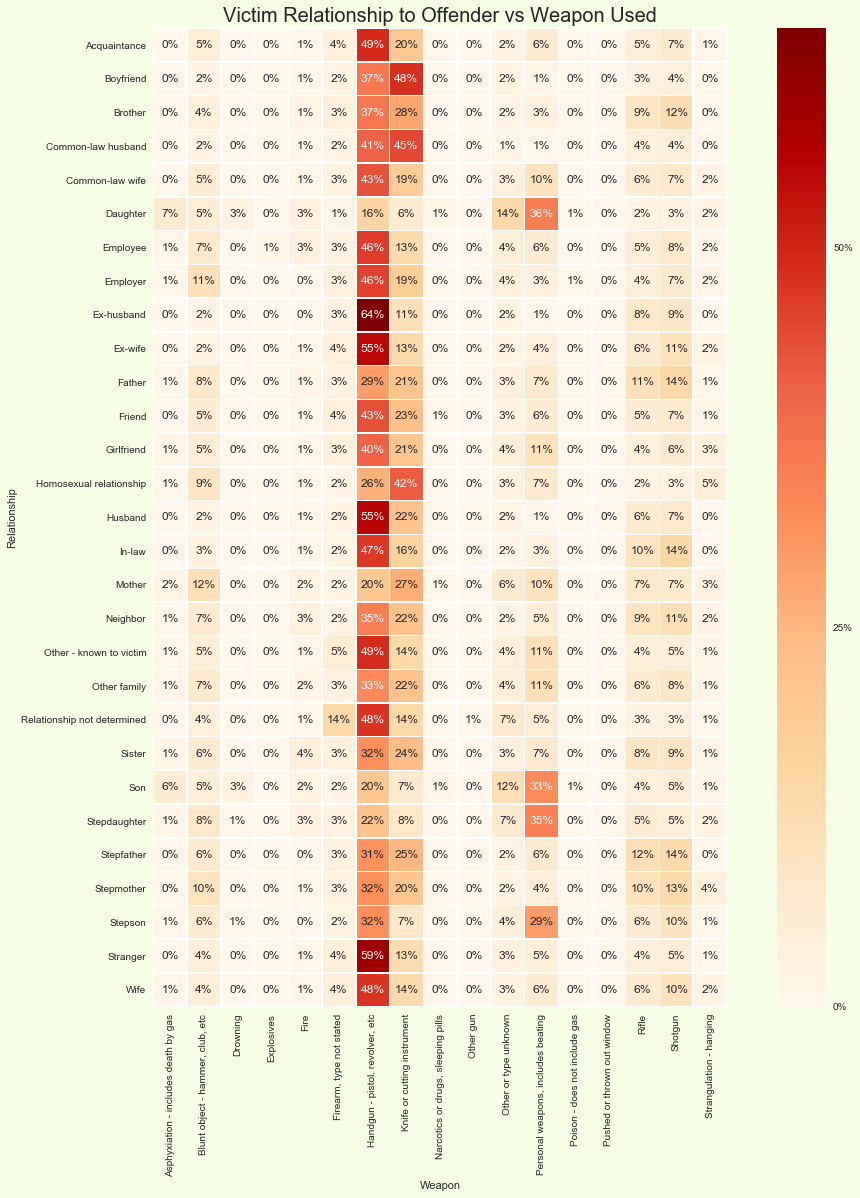

In [868]:
plt.figure(figsize=(18,18),facecolor='#F6FFE5')
sns.set()
ax = sns.heatmap(pd.crosstab(df.Relationship,df.Weapon).apply(lambda r: r/r.sum(), axis=1), fmt=".0%",square= True, linewidths=.5, annot=True, cmap='OrRd')
ax.set_title('Victim Relationship to Offender vs Weapon Used', size='20')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])

plt.savefig("relationship.pdf")

In [869]:
df.groupby('OffAge')['VicAge'].mean().head()

OffAge
4.0    15.142857
5.0     6.692308
6.0    11.258065
7.0    24.125000
8.0    17.647059
Name: VicAge, dtype: float64

In [870]:
#pd.crosstab(df.OffAge, df.Weapon).apply(lambda r: r/r.sum() > 0.2)

In [871]:
pd.crosstab(df.OffAge, df.Weapon).sum(axis=0) > 5000

Weapon
Asphyxiation - includes death by gas    False
Blunt object - hammer, club, etc         True
Drowning                                False
Explosives                              False
Fire                                    False
Firearm, type not stated                 True
Handgun - pistol, revolver, etc          True
Knife or cutting instrument              True
Narcotics or drugs, sleeping pills      False
Other gun                               False
Other or type unknown                    True
Personal weapons, includes beating       True
Poison - does not include gas           False
Pushed or thrown out window             False
Rifle                                    True
Shotgun                                  True
Strangulation - hanging                  True
dtype: bool

In [872]:
weapons = pd.crosstab(df.OffAge, df.Weapon)

In [873]:
weapons_new = weapons[['Blunt object - hammer, club, etc','Firearm, type not stated', 'Handgun - pistol, revolver, etc',
                      'Knife or cutting instrument', 'Personal weapons, includes beating', 
                       'Rifle', 'Shotgun', 'Strangulation - hanging' ]]

In [874]:
weapons_new.head(5)

Weapon,"Blunt object - hammer, club, etc","Firearm, type not stated","Handgun - pistol, revolver, etc",Knife or cutting instrument,"Personal weapons, includes beating",Rifle,Shotgun,Strangulation - hanging
OffAge,,,,,,,,
4.0,1,0,2,0,5,2,0,0
5.0,0,1,3,2,5,1,0,0
6.0,4,2,3,1,3,3,2,0
7.0,4,3,5,1,9,1,0,0
8.0,0,0,10,2,5,3,8,0


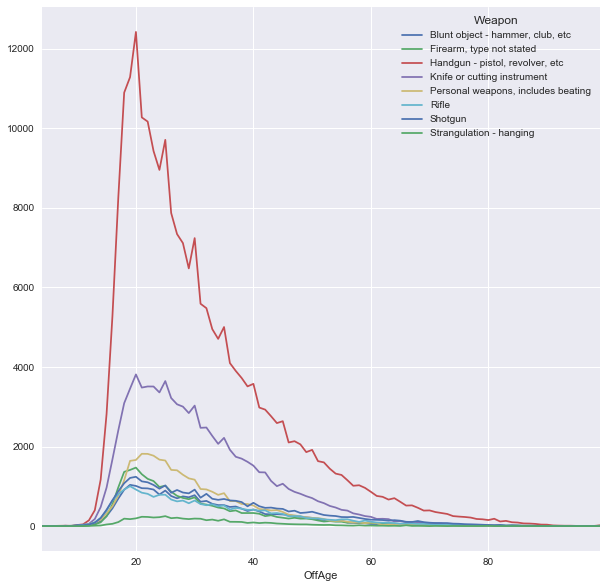

In [875]:
weapons_new.plot(figsize=(10,10))

plt.savefig("weapons_age.pdf")

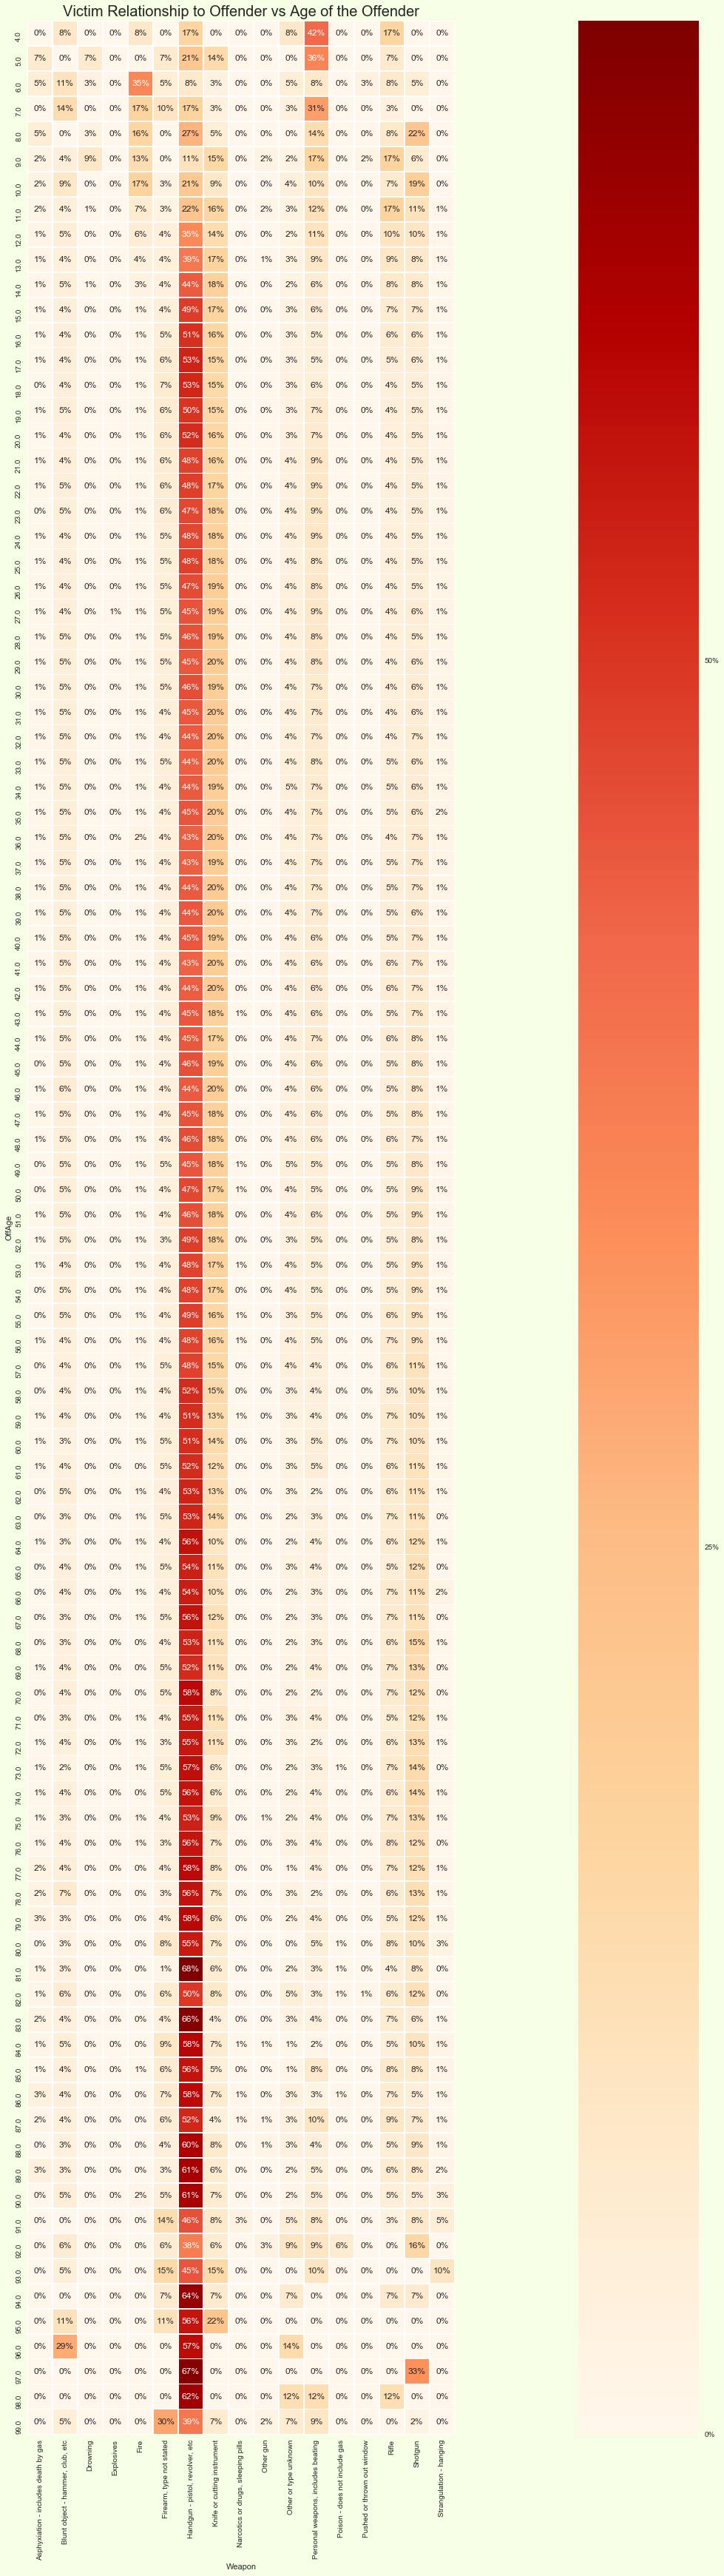

In [876]:
plt.figure(figsize=(60,60),facecolor='#F6FFE5')
sns.set()
ax = sns.heatmap(pd.crosstab(df.OffAge, df.Weapon).apply(lambda r: r/r.sum(), axis=1), fmt=".0%",square= True, linewidths=.5, annot=True, cmap='OrRd')
ax.set_title('Victim Relationship to Offender vs Age of the Offender', size='20')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])

In [877]:
df.to_csv("cleaned.csv", encoding = 'utf-8', index = False)

In [878]:
df_cleaned= pd.read_csv("cleaned-csv.csv")

In [879]:
weapons_new[85:].sum()

Weapon
Blunt object - hammer, club, etc       33
Firearm, type not stated               59
Handgun - pistol, revolver, etc       429
Knife or cutting instrument            50
Personal weapons, includes beating     51
Rifle                                  47
Shotgun                                55
Strangulation - hanging                12
dtype: int64

In [880]:
#df.plot(stacked=True ,kind='bar') and I will have son, dauter gun beating strang.

In [881]:
relationships = df

In [882]:
relationships.loc[(relationships['Relationship'] == 'Wife') | (relationships['Relationship'] == 'Ex-Wife') |
             (relationships['Relationship'] == 'Common-Law Wife'), 'Relationship_new'] = 'Wife'

In [883]:
relationships.head(1)

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Relationship_new
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48.0,Male,American Indian or Alaskan Native,55.0,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,NaN


In [884]:
relationships.loc[(relationships['Relationship'] == 'Husband') | (relationships['Relationship'] == 'Ex-Husband') |
             (relationships['Relationship'] == 'Common-Law Husband'), 'Relationship_new'] = 'Husband'

In [885]:
relationships.loc[(relationships['Relationship'] == 'Father') | (relationships['Relationship'] == 'In-Law') |
             (relationships['Relationship'] == 'Mother') | (relationships['Relationship'] == 'Stepfather') |
             (relationships['Relationship'] == 'Stepmother'), 'Relationship_new'] = 'Parent'

In [886]:
relationships.loc[(relationships['Relationship'] == 'Daughter') | (relationships['Relationship'] == 'Son') |
             (relationships['Relationship'] == 'Stepdaughter') | 
             (relationships['Relationship'] == 'Stepson'), 'Relationship_new'] = 'Children'

In [887]:
relationships.loc[(relationships['Relationship'] == 'Brother') | (relationships['Relationship'] == 'Sister'),
             'Relationship_new'] = 'Sibling'

In [888]:
relationships.loc[(relationships['Relationship'] == 'Employee') | (relationships['Relationship'] == 'Employer') ,
             'Relationship_new'] = 'Workplace'

In [889]:
relationships['Relationship_new'].value_counts()

Wife         26713
Children     20470
Parent       11662
Husband      11404
Sibling       7252
Workplace      964
Name: Relationship_new, dtype: int64

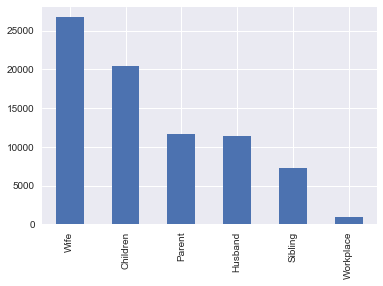

In [890]:
relationships['Relationship_new'].value_counts().plot(kind='bar')

plt.savefig("victims.pdf")

In [891]:
family_hom['Weapon'].unique()

array(['Knife or cutting instrument', 'Shotgun',
       'Handgun - pistol, revolver, etc', 'Rifle',
       'Personal weapons, includes beating', 'Other or type unknown',
       'Strangulation - hanging', 'Blunt object - hammer, club, etc',
       'Fire', 'Firearm, type not stated',
       'Narcotics or drugs, sleeping pills',
       'Poison - does not include gas', 'Other gun',
       'Pushed or thrown out window', 'Explosives'], dtype=object)

In [892]:
relationships.loc[(relationships['Weapon'] == 'Shotgun') | (relationships['Weapon'] == 'Rifle'),
               'Weapon_new'] = 'Long Gun'

In [893]:
#relationships.loc[(relationships['Weapon'] == 'Firearm, type not stated'),
            #   'Weapon_new'] = 'Other gun'

In [894]:
relationships.loc[(relationships['Weapon'] == 'Drowning') | (relationships['Weapon'] == 'Asphyxiation - includes death by gas')
               | (relationships['Weapon'] == 'Strangulation - hanging'),
               'Weapon_new'] = 'Drowning - Asphyxiation'

In [895]:
relationships.loc[(relationships['Weapon'] == 'Poison - does not include gas')| (relationships['Weapon'] == 'Narcotics or drugs, sleeping pills'),
               'Weapon_new'] = 'Narcotics or poison'

In [896]:
relationships.loc[(relationships['Weapon'] == 'Explosives') | (relationships['Weapon'] == 'Fire'),
               'Weapon_new'] = 'Fire or Explosives'

In [897]:
relationships.loc[(relationships['Weapon'] == 'Knife or cutting instrument'),
               'Weapon_new'] = 'Knife or cutting instrument'

In [898]:
relationships.loc[(relationships['Weapon'] == 'Handgun - pistol, revolver, etc'),
               'Weapon_new'] = 'Handgun'

In [899]:
relationships.loc[(relationships['Weapon'] == 'Personal weapons, includes beating'),
               'Weapon_new'] = 'Beating'

In [915]:
relationships.loc[(relationships['Weapon'] == 'Blunt object - hammer, club, etc'),
               'Weapon_new'] = 'Blunt object - hammer,etc'

In [924]:
relationships.dtypes

ID                   object
State                object
Source               object
Solved               object
Year                  int64
Month                object
Incident            float64
ActionType           object
Homicide             object
Situation            object
VicAge              float64
VicSex               object
VicRace              object
OffAge              float64
OffSex               object
OffRace              object
Weapon               object
Relationship         object
Circumstance         object
Relationship_new     object
Weapon_new           object
Family Member        object
dtype: object

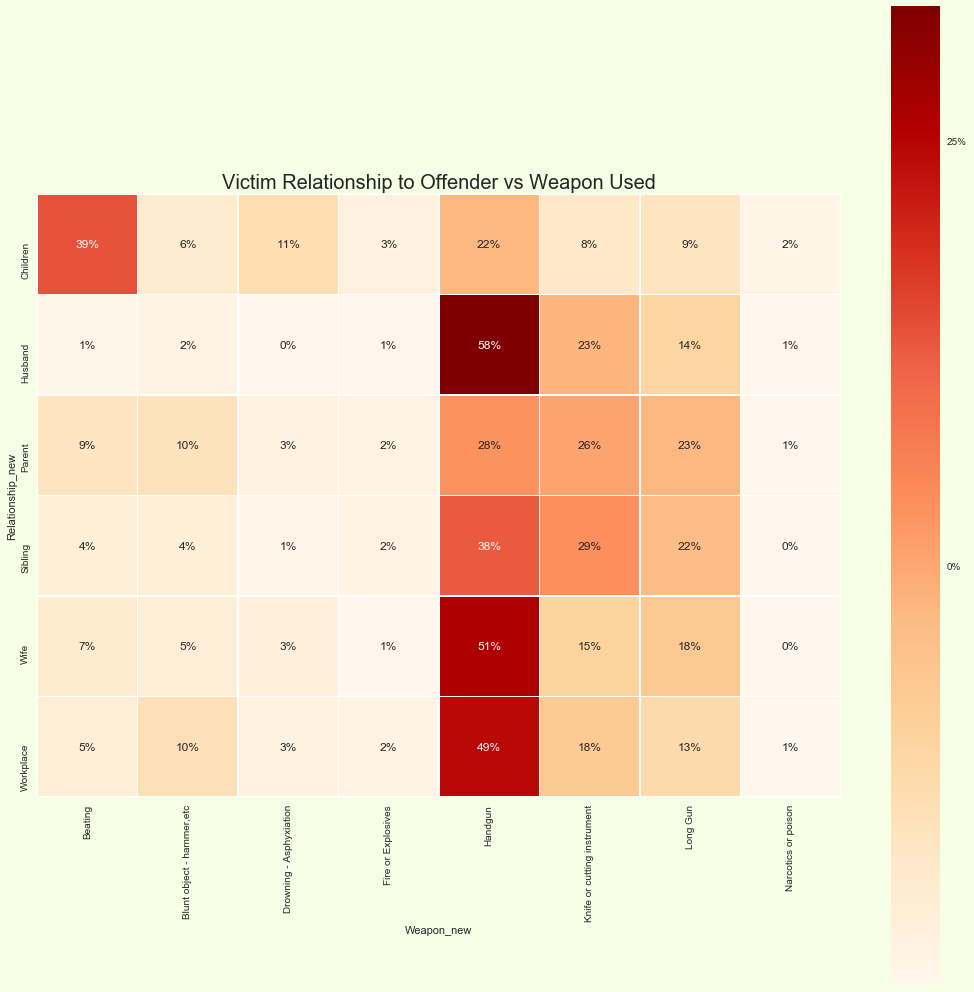

In [922]:
plt.figure(figsize=(18,18),facecolor='#F6FFE5')
sns.set()
ax = sns.heatmap(pd.crosstab(relationships.Relationship_new,relationships.Weapon_new).apply(lambda r: r/r.sum(), axis=1), fmt=".0%",square= True, linewidths=.5, annot=True, cmap='OrRd')
ax.set_title('Victim Relationship to Offender vs Weapon Used', size='20')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])

plt.savefig("test.pdf")

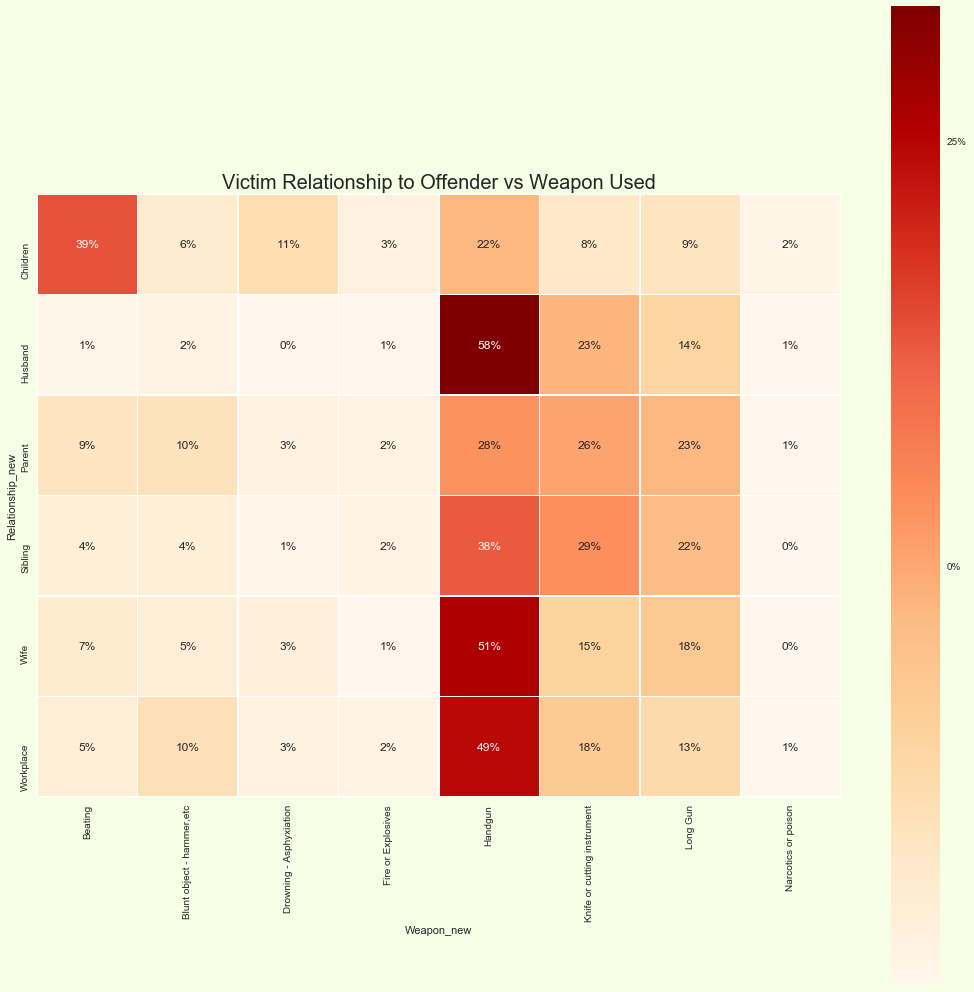

In [921]:

import pandas as pd
import matplotlib as mpl
# Set new Backend to Use Seaborn
# mpl.use('Agg')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import colorsys
import numpy as np


plt.figure(figsize=(18,18),facecolor='#F6FFE5')
sns.set(style='white')
ax = sns.heatmap(pd.crosstab(relationships.Relationship_new,relationships.Weapon_new).apply(lambda r: r/r.sum(), axis=1), fmt=".0%",square= True, linewidths=.5, annot=True, cmap='OrRd')
ax.set_title('Victim Relationship to Offender vs Weapon Used', size='20')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])


#plt.figure(figsize=(12, 8))
#sns.heatmap(relationships['Weapon_new'], mask=relationships['Weapon_new'].isnull(), annot=True, fmt='.0%');

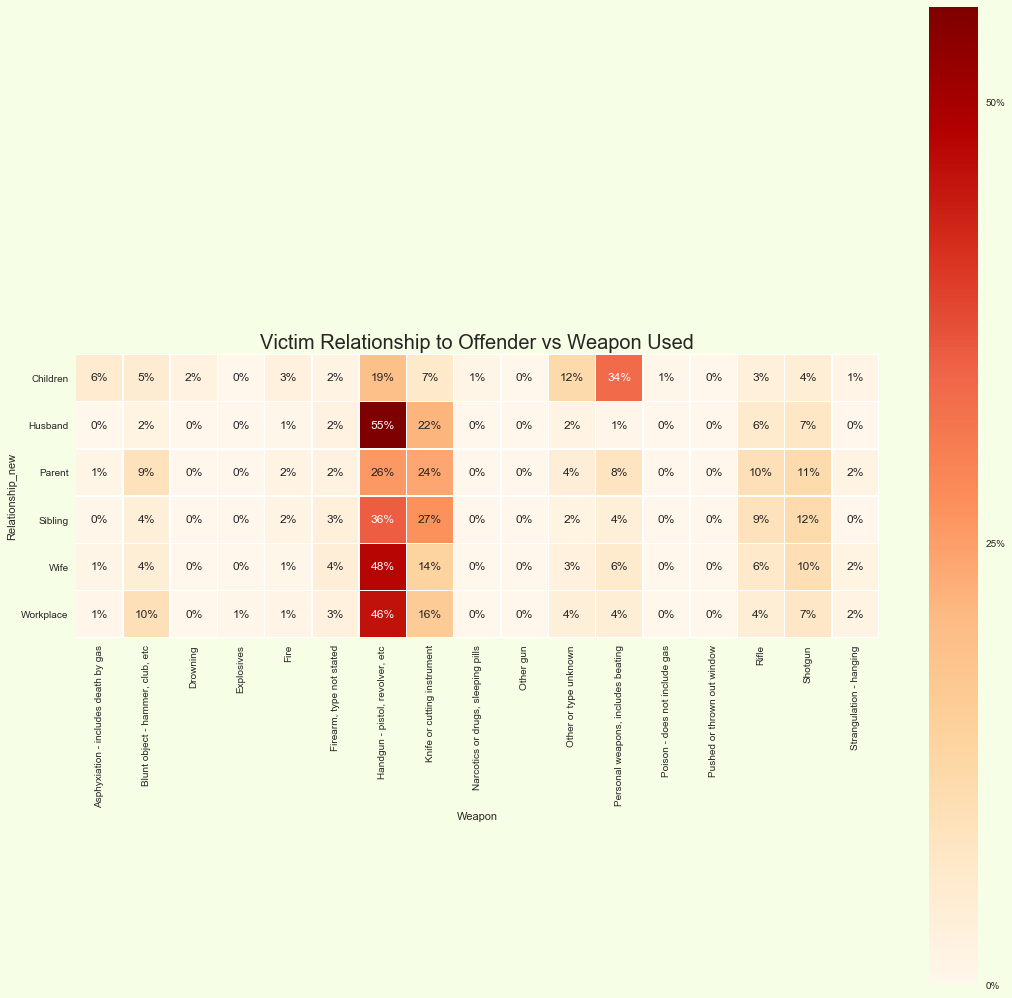

In [901]:
plt.figure(figsize=(18,18),facecolor='#F6FFE5')
sns.set()
ax = sns.heatmap(pd.crosstab(df.Relationship_new,df.Weapon).apply(lambda r: r/r.sum(), axis=1), fmt=".0%",square= True, linewidths=.5, annot=True, cmap='OrRd')
ax.set_title('Victim Relationship to Offender vs Weapon Used', size='20')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])


plt.savefig("family_weapons.pdf")

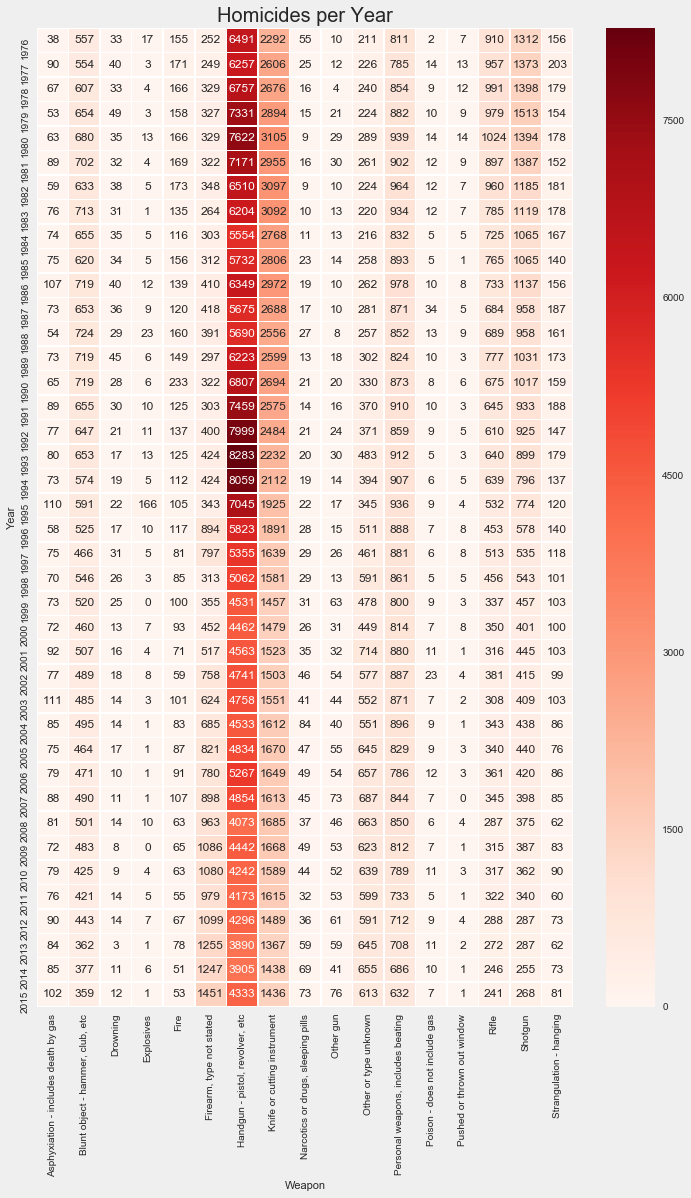

In [902]:
plt.figure(figsize=(12,18),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
ax = sns.heatmap(pd.crosstab(df.Year,df.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')
ax.set_title('Homicides per Year', size='20')

plt.savefig("year.pdf")

In [903]:
relationships.reset_index()

,index,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Relationship_new,Weapon_new
0,0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48.0,Male,American Indian or Alaskan Native,55.0,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,Husband,Knife or cutting instrument
1,1,197601001AL00102,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Male,Black,67.0,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen,NaN,Long Gun
2,2,197601001AL00104,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45.0,Female,Black,53.0,Male,Black,Shotgun,Wife,Other,Wife,Long Gun
3,3,197601001AL00106,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43.0,Male,Black,35.0,Female,Black,Knife or cutting instrument,Brother,Other arguments,Sibling,Knife or cutting instrument
4,4,197601001AL00201,Alabama,FBI,Yes,1976,January,1.0,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35.0,Male,White,25.0,Female,White,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,Drowning - Asphyxiation
5,5,197601001AL00202,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,25.0,Male,Black,26.0,Male,Black,Rifle,Friend,Other arguments,NaN,Long Gun
6,6,197601001AL00300,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Female,Black,29.0,Male,Black,"Handgun - pistol, revolver, etc",Wife,Other arguments,Wife,Handgun
7,7,197601001AL00301,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,42.0,Female,Black,19.0,Male,Black,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,NaN,Knife or cutting instrument
8,8,197601001AL00500,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41.0,Male,White,30.0,Female,White,Shotgun,Husband,Other arguments,Husband,Long Gun
9,9,197601001AL01101,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,50.0,Male,White,42.0,Male,White,"Handgun - pistol, revolver, etc",Brother,Other arguments,Sibling,Handgun


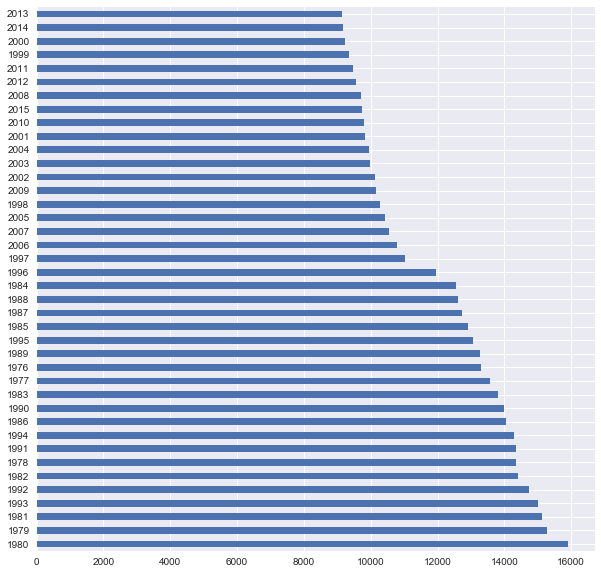

In [904]:
df['Year'].value_counts().plot(kind='barh', figsize= (10,10))

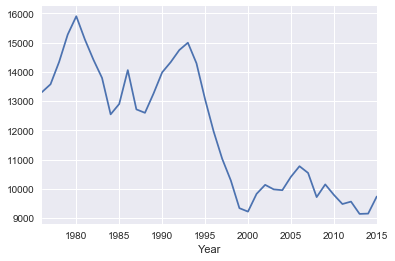

In [905]:
df.groupby('Year').size().plot()

plt.savefig("timeline.pdf")

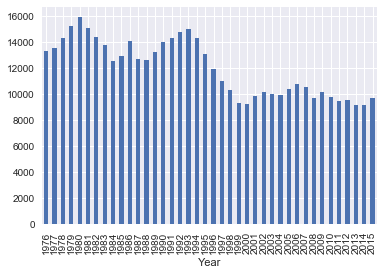

In [906]:
df.groupby('Year').size().plot(kind='bar')

In [907]:
relationships.loc[(relationships['Relationship'] == 'Brother') | (relationships['Relationship'] == 'Sister'),
             'Family Member'] = 'Yes'


relationships.loc[(relationships['Relationship'] == 'Wife') | (relationships['Relationship'] == 'Ex-Wife') |
             (relationships['Relationship'] == 'Common-Law Wife'), 'Family Member'] = 'Yes'


relationships.loc[(relationships['Relationship'] == 'Husband') | (relationships['Relationship'] == 'Ex-Husband') |
             (relationships['Relationship'] == 'Common-Law Husband'), 'Family Member'] = 'Yes'

relationships.loc[(relationships['Relationship'] == 'Father') | (relationships['Relationship'] == 'In-Law') |
             (relationships['Relationship'] == 'Mother') | (relationships['Relationship'] == 'Stepfather') |
             (relationships['Relationship'] == 'Stepmother'), 'Family Member'] = 'Yes'

relationships.loc[(relationships['Relationship'] == 'Daughter') | (relationships['Relationship'] == 'Son') |
             (relationships['Relationship'] == 'Stepdaughter') | 
             (relationships['Relationship'] == 'Stepson'), 'Family Member'] = 'Yes'

relationships.loc[(relationships['Relationship'] == 'Other family'), 'Family Member'] = 'Yes'

In [908]:
relationships.loc[(relationships['Relationship'] == 'Stranger'), 'Family Member'] = 'Stranger'

In [909]:
relationships.loc[(relationships['Relationship'] == 'Employee') | (relationships['Relationship'] == 'Boyfriend') 
                  | (relationships['Relationship'] == 'Girlfriend') | (relationships['Relationship'] == 'Employer')
                  | (relationships['Relationship'] == 'Relationship not determined') | (relationships['Relationship'] == 'Friend') 
                  | (relationships['Relationship'] == 'Acquaintance') | (relationships['Relationship'] == 'Other - known to victim') 
                  | (relationships['Relationship'] == 'Neighbor') , 'Family Member'] = 'Not family, but known to the victim'  

In [910]:
df.Relationship.unique()

array(['Husband', 'Acquaintance', 'Wife', 'Brother', 'Friend',
       'Relationship not determined', 'Stranger', 'In-law', 'Stepfather',
       'Boyfriend', 'Father', 'Neighbor', 'Ex-husband', 'Stepson',
       'Homosexual relationship', 'Daughter', 'Common-law wife',
       'Other - known to victim', 'Other family', 'Son', 'Girlfriend',
       'Sister', 'Common-law husband', 'Ex-wife', 'Mother', 'Employee',
       'Stepdaughter', 'Employer', 'Stepmother'], dtype=object)

In [911]:
relationships.head()

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Relationship_new,Weapon_new,Family Member
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48.0,Male,American Indian or Alaskan Native,55.0,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,Husband,Knife or cutting instrument,Yes
1,197601001AL00102,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Male,Black,67.0,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen,NaN,Long Gun,"Not family, but known to the victim"
2,197601001AL00104,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45.0,Female,Black,53.0,Male,Black,Shotgun,Wife,Other,Wife,Long Gun,Yes
3,197601001AL00106,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43.0,Male,Black,35.0,Female,Black,Knife or cutting instrument,Brother,Other arguments,Sibling,Knife or cutting instrument,Yes
4,197601001AL00201,Alabama,FBI,Yes,1976,January,1.0,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35.0,Male,White,25.0,Female,White,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,Drowning - Asphyxiation,"Not family, but known to the victim"


# Does the victim know his killer?

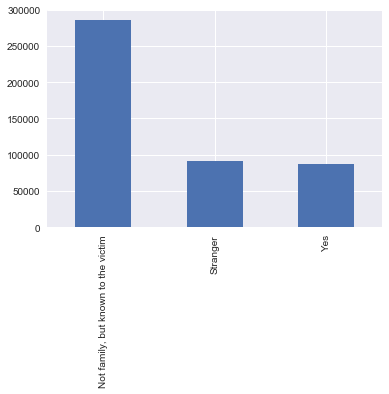

In [912]:
relationships['Family Member'].value_counts().plot(kind='bar')


In [913]:
relationships['Family Member'].value_counts()

Not family, but known to the victim    285681
Stranger                                91471
Yes                                     87573
Name: Family Member, dtype: int64

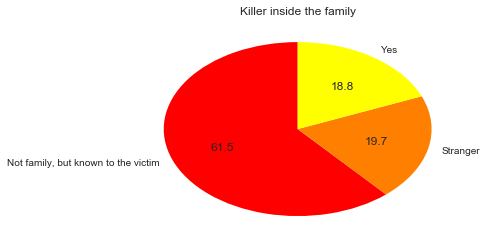

In [914]:
known = pd.DataFrame(relationships, columns = ['Family Member']) 
count_hom = known.stack().value_counts()
ax = count_hom.plot(kind = 'pie',
                              title = 'Killer inside the family',
                              startangle = 90, 
                    cmap='autumn',
                              autopct='%.1f')
ax.set_ylabel('')